# D7047E Lab0

# Task 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


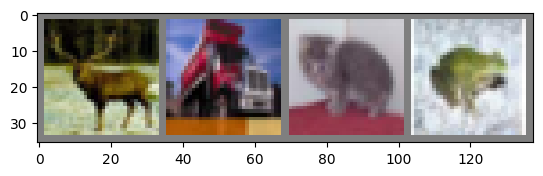

deer  truck cat   frog 


In [2]:
batch_size = 4

# Class labels
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [3]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.leakyrelu = nn.LeakyReLU()

    def forward(self, x):
        x = self.pool(self.leakyrelu(self.conv1(x)))
        x = self.pool(self.leakyrelu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.leakyrelu(self.fc1(x))
        x = self.leakyrelu(self.fc2(x))
        x = self.fc3(x)
        return x

net = SimpleCNN()
optimizer = optim.SGD(net.parameters(), lr=0.0001)

In [4]:
criterion = nn.CrossEntropyLoss()

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[Epoch %d, Batch %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 1, Batch  2000] loss: 2.304
[Epoch 1, Batch  4000] loss: 2.303
[Epoch 1, Batch  6000] loss: 2.303
[Epoch 1, Batch  8000] loss: 2.304
[Epoch 1, Batch 10000] loss: 2.303
[Epoch 1, Batch 12000] loss: 2.303


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 2, Batch  2000] loss: 2.303
[Epoch 2, Batch  4000] loss: 2.302
[Epoch 2, Batch  6000] loss: 2.301
[Epoch 2, Batch  8000] loss: 2.302
[Epoch 2, Batch 10000] loss: 2.302
[Epoch 2, Batch 12000] loss: 2.301
Finished Training


In [5]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Accuracy of the network on the 10000 test images: 12 %


In [6]:
# Redefining the SimpleCNN class with Tanh activation
class SimpleCNN_Tanh(nn.Module):
    def __init__(self):
        super(SimpleCNN_Tanh, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.pool(self.tanh(self.conv1(x)))
        x = self.pool(self.tanh(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

net_tanh = SimpleCNN_Tanh()
optimizer = optim.Adam(net_tanh.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Training the network with Tanh activation
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net_tanh(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

# Testing the network with Tanh activation
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net_tanh(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_tanh = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy_tanh}%')

/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 1, Batch 2000] Loss: 1.975
[Epoch 1, Batch 4000] Loss: 1.768
[Epoch 1, Batch 6000] Loss: 1.648
[Epoch 1, Batch 8000] Loss: 1.569
[Epoch 1, Batch 10000] Loss: 1.523
[Epoch 1, Batch 12000] Loss: 1.487


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 2, Batch 2000] Loss: 1.458
[Epoch 2, Batch 4000] Loss: 1.441
[Epoch 2, Batch 6000] Loss: 1.399
[Epoch 2, Batch 8000] Loss: 1.387
[Epoch 2, Batch 10000] Loss: 1.375
[Epoch 2, Batch 12000] Loss: 1.339


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Accuracy of the network on the 10000 test images: 52.13%


In [7]:
# Setting up TensorBoard
writer = SummaryWriter('runs/cifar10_experiment_tanh')

# Training the network
for epoch in range(2): 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net_tanh(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:  # Log every 2000 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 2000:.3f}')
            writer.add_scalar('training loss', running_loss / 2000, epoch * len(trainloader) + i)
            running_loss = 0.0

# Testing the network
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net_tanh(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_tanh = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy_tanh}%')
writer.add_scalar('Accuracy', accuracy_tanh, 0)
writer.close()

/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 1, Batch 2000] Loss: 1.307
[Epoch 1, Batch 4000] Loss: 1.301
[Epoch 1, Batch 6000] Loss: 1.302
[Epoch 1, Batch 8000] Loss: 1.288
[Epoch 1, Batch 10000] Loss: 1.284
[Epoch 1, Batch 12000] Loss: 1.278


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 2, Batch 2000] Loss: 1.217
[Epoch 2, Batch 4000] Loss: 1.222
[Epoch 2, Batch 6000] Loss: 1.223
[Epoch 2, Batch 8000] Loss: 1.216
[Epoch 2, Batch 10000] Loss: 1.208
[Epoch 2, Batch 12000] Loss: 1.191


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Accuracy of the network on the 10000 test images: 56.32%


# Task 2

In [9]:
from torchvision import models

transform = transforms.Compose([
    transforms.Resize(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Define the modified AlexNet model
class AlexNetModified(nn.Module):
    def __init__(self, num_classes=10, pretrained=False):
        super(AlexNetModified, self).__init__()
        original_model = models.alexnet(pretrained=pretrained)
        self.features = original_model.features
        self.avgpool = original_model.avgpool
        self.classifier = nn.Sequential(
            *list(original_model.classifier[:-1]),  # Reuse the original layers except the last one
            nn.Linear(4096, num_classes)  # New classifier layer for CIFAR-10
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Setup for fine-tuning
model_finetune = AlexNetModified(pretrained=False).to(device)
optimizer_finetune = optim.Adam(model_finetune.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Setup for feature extraction
model_extract = AlexNetModified(pretrained=True).to(device)
for param in model_extract.features.parameters():
    param.requires_grad = False
optimizer_extract = optim.Adam(model_extract.classifier.parameters(), lr=0.001)

# Function to train the network
def train(model, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 100 == 99:  # Print every 100 mini-batches
                print(f'[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}')
                running_loss = 0.0

# Function to test the network
def test(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the 10000 test images: {accuracy}%')
    return accuracy

# Run training and testing
print("Fine-tuning model...")
train(model_finetune, optimizer_finetune, num_epochs=10)
accuracy_finetune = test(model_finetune)

print("\nUsing pretrained model for feature extraction...")
train(model_extract, optimizer_extract, num_epochs=10)
accuracy_extract = test(model_extract)

Files already downloaded and verified
Files already downloaded and verified


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(ms

Fine-tuning model...


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 1, Batch 100] Loss: 2.159
[Epoch 1, Batch 200] Loss: 1.858
[Epoch 1, Batch 300] Loss: 1.755
[Epoch 1, Batch 400] Loss: 1.661
[Epoch 1, Batch 500] Loss: 1.594
[Epoch 1, Batch 600] Loss: 1.545
[Epoch 1, Batch 700] Loss: 1.558


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 2, Batch 100] Loss: 1.455
[Epoch 2, Batch 200] Loss: 1.441
[Epoch 2, Batch 300] Loss: 1.404
[Epoch 2, Batch 400] Loss: 1.369
[Epoch 2, Batch 500] Loss: 1.357
[Epoch 2, Batch 600] Loss: 1.326
[Epoch 2, Batch 700] Loss: 1.311


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 3, Batch 100] Loss: 1.273
[Epoch 3, Batch 200] Loss: 1.279
[Epoch 3, Batch 300] Loss: 1.247
[Epoch 3, Batch 400] Loss: 1.248
[Epoch 3, Batch 500] Loss: 1.230
[Epoch 3, Batch 600] Loss: 1.224
[Epoch 3, Batch 700] Loss: 1.217


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 4, Batch 100] Loss: 1.150
[Epoch 4, Batch 200] Loss: 1.139
[Epoch 4, Batch 300] Loss: 1.153
[Epoch 4, Batch 400] Loss: 1.154
[Epoch 4, Batch 500] Loss: 1.152
[Epoch 4, Batch 600] Loss: 1.111
[Epoch 4, Batch 700] Loss: 1.178


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 5, Batch 100] Loss: 1.056
[Epoch 5, Batch 200] Loss: 1.068
[Epoch 5, Batch 300] Loss: 1.093
[Epoch 5, Batch 400] Loss: 1.049
[Epoch 5, Batch 500] Loss: 1.075
[Epoch 5, Batch 600] Loss: 1.053
[Epoch 5, Batch 700] Loss: 1.081


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 6, Batch 100] Loss: 1.017
[Epoch 6, Batch 200] Loss: 1.025
[Epoch 6, Batch 300] Loss: 1.006
[Epoch 6, Batch 400] Loss: 1.021
[Epoch 6, Batch 500] Loss: 1.015
[Epoch 6, Batch 600] Loss: 1.045
[Epoch 6, Batch 700] Loss: 1.026


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 7, Batch 100] Loss: 0.980
[Epoch 7, Batch 200] Loss: 0.957
[Epoch 7, Batch 300] Loss: 0.998
[Epoch 7, Batch 400] Loss: 0.968
[Epoch 7, Batch 500] Loss: 1.005
[Epoch 7, Batch 600] Loss: 0.977
[Epoch 7, Batch 700] Loss: 0.996


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 8, Batch 100] Loss: 0.903
[Epoch 8, Batch 200] Loss: 0.930
[Epoch 8, Batch 300] Loss: 0.927
[Epoch 8, Batch 400] Loss: 0.947
[Epoch 8, Batch 500] Loss: 0.946
[Epoch 8, Batch 600] Loss: 0.960
[Epoch 8, Batch 700] Loss: 0.942


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 9, Batch 100] Loss: 0.878
[Epoch 9, Batch 200] Loss: 0.902
[Epoch 9, Batch 300] Loss: 0.901
[Epoch 9, Batch 400] Loss: 0.885
[Epoch 9, Batch 500] Loss: 0.915
[Epoch 9, Batch 600] Loss: 0.919
[Epoch 9, Batch 700] Loss: 0.898


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 10, Batch 100] Loss: 0.838
[Epoch 10, Batch 200] Loss: 0.883
[Epoch 10, Batch 300] Loss: 0.876
[Epoch 10, Batch 400] Loss: 0.888
[Epoch 10, Batch 500] Loss: 0.902
[Epoch 10, Batch 600] Loss: 0.884
[Epoch 10, Batch 700] Loss: 0.874


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Accuracy of the network on the 10000 test images: 68.05%

Using pretrained model for feature extraction...


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 1, Batch 100] Loss: 1.147
[Epoch 1, Batch 200] Loss: 0.889
[Epoch 1, Batch 300] Loss: 0.859
[Epoch 1, Batch 400] Loss: 0.836
[Epoch 1, Batch 500] Loss: 0.822
[Epoch 1, Batch 600] Loss: 0.785
[Epoch 1, Batch 700] Loss: 0.748


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 2, Batch 100] Loss: 0.699
[Epoch 2, Batch 200] Loss: 0.714
[Epoch 2, Batch 300] Loss: 0.684
[Epoch 2, Batch 400] Loss: 0.704
[Epoch 2, Batch 500] Loss: 0.708
[Epoch 2, Batch 600] Loss: 0.693
[Epoch 2, Batch 700] Loss: 0.674


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 3, Batch 100] Loss: 0.610
[Epoch 3, Batch 200] Loss: 0.612
[Epoch 3, Batch 300] Loss: 0.616
[Epoch 3, Batch 400] Loss: 0.635
[Epoch 3, Batch 500] Loss: 0.636
[Epoch 3, Batch 600] Loss: 0.642
[Epoch 3, Batch 700] Loss: 0.646


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 4, Batch 100] Loss: 0.563
[Epoch 4, Batch 200] Loss: 0.548
[Epoch 4, Batch 300] Loss: 0.584
[Epoch 4, Batch 400] Loss: 0.586
[Epoch 4, Batch 500] Loss: 0.593
[Epoch 4, Batch 600] Loss: 0.609
[Epoch 4, Batch 700] Loss: 0.605


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 5, Batch 100] Loss: 0.522
[Epoch 5, Batch 200] Loss: 0.522
[Epoch 5, Batch 300] Loss: 0.539
[Epoch 5, Batch 400] Loss: 0.557
[Epoch 5, Batch 500] Loss: 0.542
[Epoch 5, Batch 600] Loss: 0.560
[Epoch 5, Batch 700] Loss: 0.557


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 6, Batch 100] Loss: 0.504
[Epoch 6, Batch 200] Loss: 0.509
[Epoch 6, Batch 300] Loss: 0.520
[Epoch 6, Batch 400] Loss: 0.523
[Epoch 6, Batch 500] Loss: 0.520
[Epoch 6, Batch 600] Loss: 0.511
[Epoch 6, Batch 700] Loss: 0.535


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 7, Batch 100] Loss: 0.489
[Epoch 7, Batch 200] Loss: 0.476
[Epoch 7, Batch 300] Loss: 0.488
[Epoch 7, Batch 400] Loss: 0.467
[Epoch 7, Batch 500] Loss: 0.484
[Epoch 7, Batch 600] Loss: 0.514
[Epoch 7, Batch 700] Loss: 0.507


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 8, Batch 100] Loss: 0.451
[Epoch 8, Batch 200] Loss: 0.462
[Epoch 8, Batch 300] Loss: 0.457
[Epoch 8, Batch 400] Loss: 0.477
[Epoch 8, Batch 500] Loss: 0.472
[Epoch 8, Batch 600] Loss: 0.480
[Epoch 8, Batch 700] Loss: 0.475


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 9, Batch 100] Loss: 0.435
[Epoch 9, Batch 200] Loss: 0.442
[Epoch 9, Batch 300] Loss: 0.445
[Epoch 9, Batch 400] Loss: 0.435
[Epoch 9, Batch 500] Loss: 0.432
[Epoch 9, Batch 600] Loss: 0.434
[Epoch 9, Batch 700] Loss: 0.444


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 10, Batch 100] Loss: 0.408
[Epoch 10, Batch 200] Loss: 0.433
[Epoch 10, Batch 300] Loss: 0.405
[Epoch 10, Batch 400] Loss: 0.429
[Epoch 10, Batch 500] Loss: 0.432
[Epoch 10, Batch 600] Loss: 0.439
[Epoch 10, Batch 700] Loss: 0.418


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Accuracy of the network on the 10000 test images: 83.82%
